# Метод опорных векторов

# Содержание работы

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

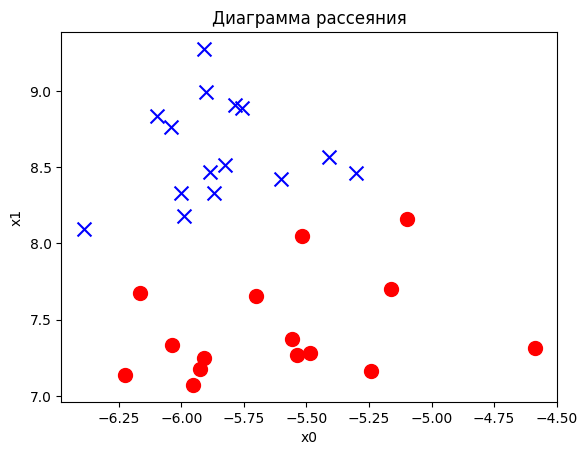

In [5]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [6]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)

SVC(C=100, kernel='linear')

In [7]:
svm_linear.coef_

array([[-2.49920793,  6.14683189]])

In [8]:
svm_linear.intercept_

array([-64.2533988])

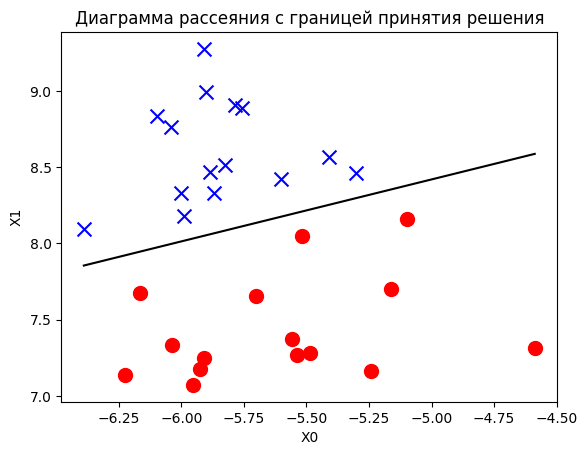

In [9]:
X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])

plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c границей принятия решения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [10]:
svm_linear.support_vectors_

array([[-5.51629264,  8.04763857],
       [-5.30025769,  8.46071981],
       [-5.9879581 ,  8.18112559]])

In [11]:
svm_linear.support_

array([ 0,  8, 29], dtype=int32)

In [12]:
svm_linear.n_support_

array([1, 2], dtype=int32)

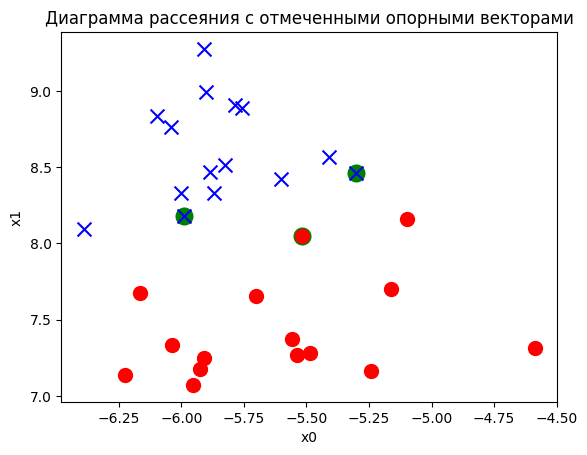

In [13]:
plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c отмеченными опорными векторами")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

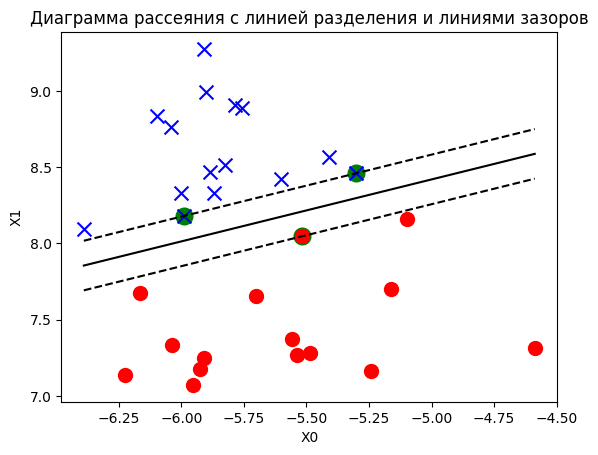

In [14]:
plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.plot(X0,(-svm_linear.intercept_[0]-1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')
plt.plot(X0,(-svm_linear.intercept_[0]+1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения и линиями зазоров")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

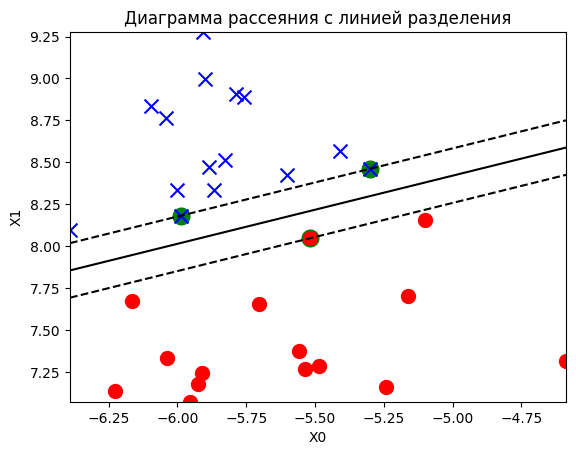

In [15]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)
Z = svm_linear.intercept_[0] + svm_linear.coef_[0][0] * X0_grid +  svm_linear.coef_[0][1] * X1_grid
plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [16]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

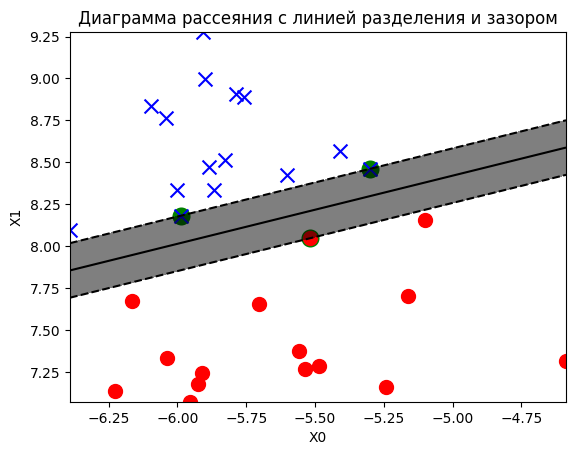

In [17]:
plot_decision_regions(X, y, svm_linear)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred =  svm_linear.predict(X)
print(accuracy_score(y, y_pred))
print(confusion_matrix(y, y_pred))


1.0
[[15  0]
 [ 0 15]]


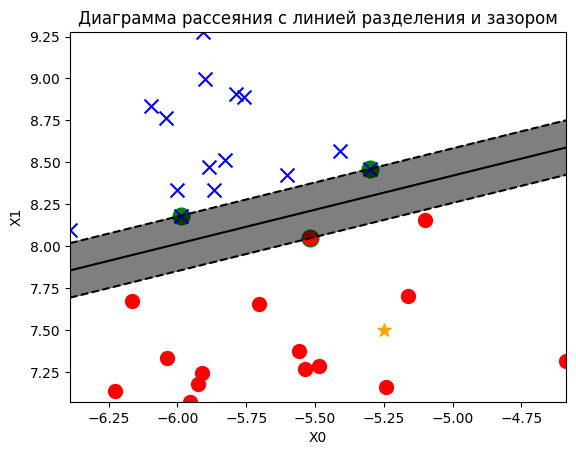

In [19]:
observation_new = [[-5.25, 7.5]]

plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [20]:
svm_linear.decision_function(observation_new)

array([-5.03131797])

In [21]:
svm_linear.predict(observation_new)

array([0])

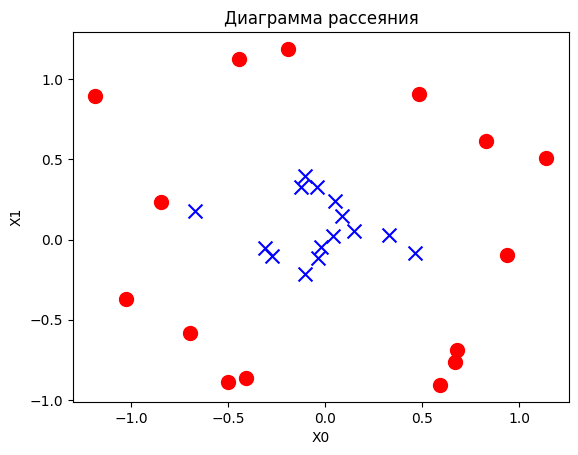

In [22]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [23]:
svm_rbf = SVC(kernel='rbf', C=100).fit(X, y)

In [24]:
print(svm_rbf.n_support_)
print(svm_rbf.support_)
print(svm_rbf.support_vectors_)

[6 2]
[11 20 21 23 28 29 25 27]
[[ 0.9388294  -0.09554628]
 [-0.84682371  0.23287306]
 [-0.19166925  1.18895776]
 [-0.69539045 -0.58523359]
 [ 0.68060508 -0.68615145]
 [ 0.48354792  0.91063288]
 [-0.66975235  0.17866445]
 [ 0.46427295 -0.08540628]]


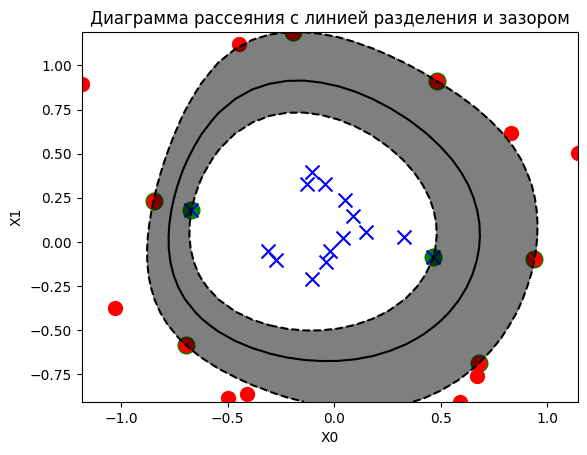

In [25]:
plot_decision_regions(X, y, svm_rbf)

In [26]:
y_pred =  svm_rbf.predict(X)
print(accuracy_score(y, y_pred))
print(confusion_matrix(y, y_pred))

1.0
[[15  0]
 [ 0 15]]


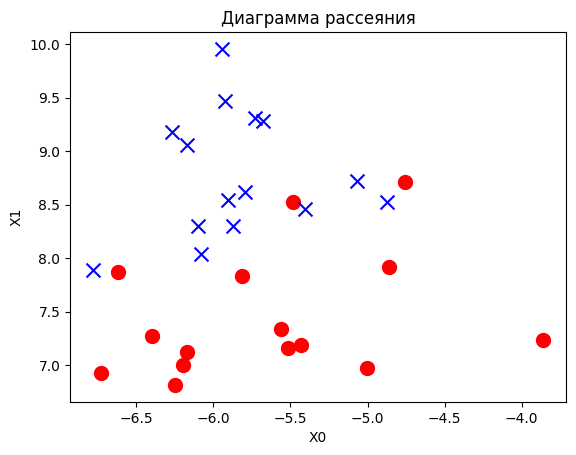

In [27]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

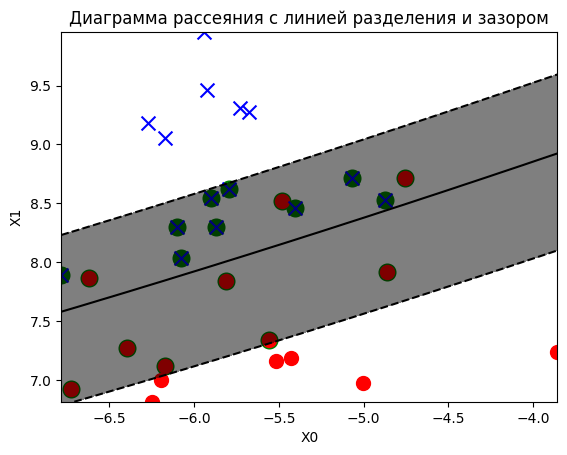

In [28]:
svm_poly = SVC(kernel='poly', degree=4, C=2).fit(X, y)
plot_decision_regions(X, y, svm_poly)

In [29]:
svm_poly.n_support_

array([9, 9], dtype=int32)

In [30]:
y_pred =  svm_poly.predict(X)
print(accuracy_score(y, y_pred))
print(confusion_matrix(y, y_pred))

0.9
[[12  3]
 [ 0 15]]


# Задания для самостоятельного выполнения

### 1. В первом задании поэкспериментируйте с различными значениями аргумента C класса SVC. Сделайте вывод о том, как он влияет на модель классификации.

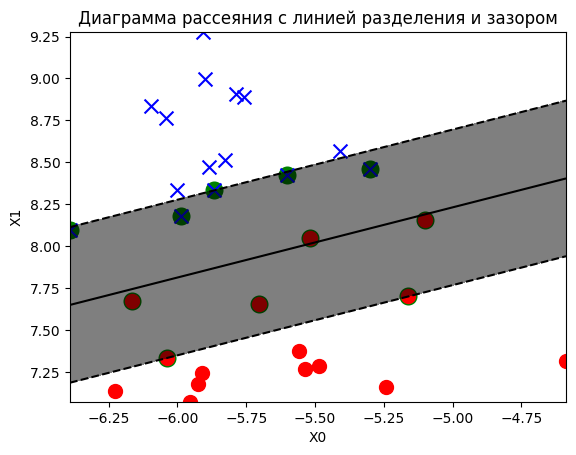

In [31]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

from sklearn.svm import SVC

svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X, y)

plot_decision_regions(X, y, svm_linear)

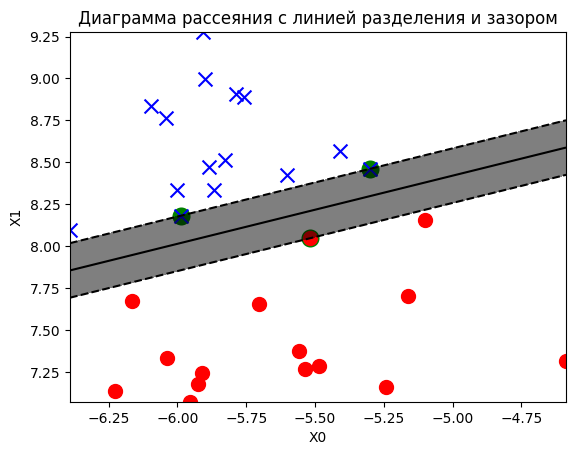

In [32]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

from sklearn.svm import SVC

svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)

plot_decision_regions(X, y, svm_linear)

Параметр `C` управляет степенью штрафа за ошибки классификации:  
- При **малых значениях C** (например, 0.01), модель слишком сильно стремится к максимальному зазору, что может приводить к недообучению.  
- При **больших значениях C** (например, 100), модель стремится минимизировать ошибки на обучении, что может привести к переобучению.  

### 2. В первом задании подвигайте точку нового предсказания. Убедитесь, что с другой стороны границы предсказывается другой класс. Как изменяется предсказание, если точка ляжет внутрь полосы зазора?

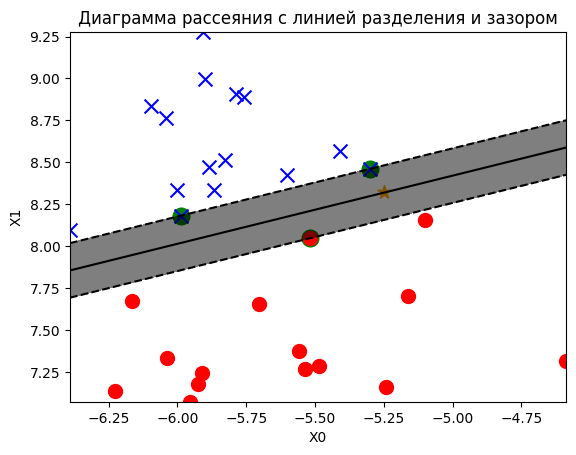

In [33]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

observation_new = [[-5.25, 8.32]]

from sklearn.svm import SVC

svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)

plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [34]:
print(svm_linear.predict(observation_new))
print(svm_linear.decision_function(observation_new))

[1]
[0.00908418]


Чем ближе точка к границе тем меньше значение desision_function, при отрицательных значениях модель предсказывает нулевой класс, при положительных первый

### 3. Во втором задании повторите анализ с методом опорных векторов с другими видами ядер. Сравните вид границы принятия решения и показатели точности модели.

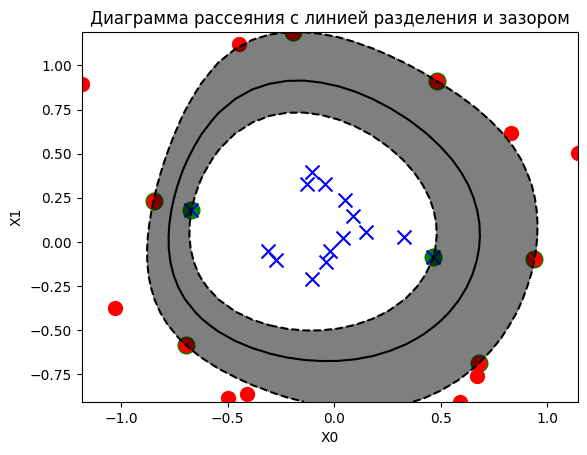

1.0
[[15  0]
 [ 0 15]]


In [35]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

svm_rbf = SVC(kernel='rbf', C=100).fit(X, y)
svm_poly = SVC(kernel='poly', C=100).fit(X, y)
svm_linear = SVC(kernel='linear', C=100).fit(X, y)
plot_decision_regions(X, y, svm_rbf)
y_pred =  svm_rbf.predict(X)
print(accuracy_score(y, y_pred))
print(confusion_matrix(y, y_pred))

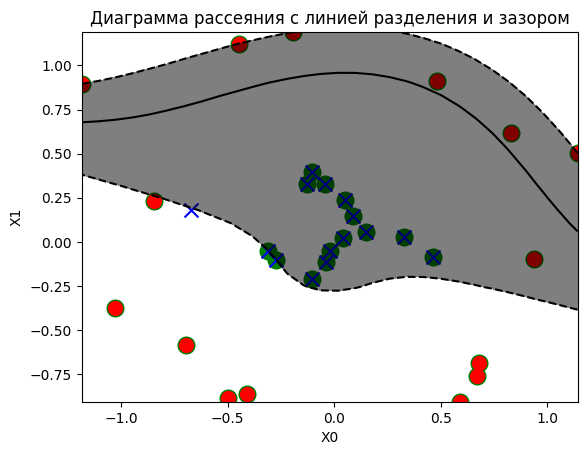

0.7
[[ 6  9]
 [ 0 15]]


In [36]:
plot_decision_regions(X, y, svm_poly)
y_pred =  svm_poly.predict(X)
print(accuracy_score(y, y_pred))
print(confusion_matrix(y, y_pred))

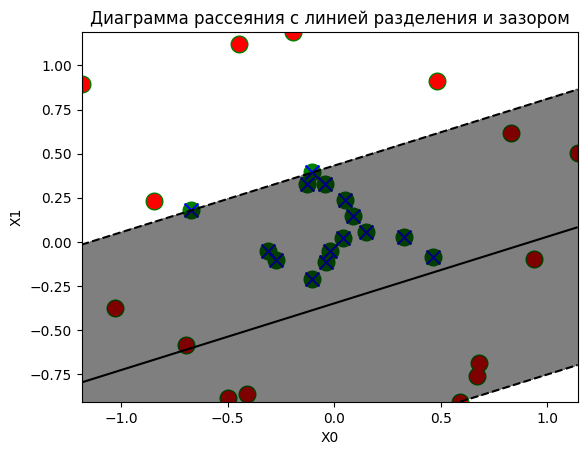

0.7
[[ 6  9]
 [ 0 15]]


In [37]:
plot_decision_regions(X, y, svm_linear)
y_pred =  svm_linear.predict(X)
print(accuracy_score(y, y_pred))
print(confusion_matrix(y, y_pred))

Модели с другими ядрами плохо справляются с таким распределением данных

### 4. В третьем задании поэкспериментируйте со значением аргумента C. Сделайте вывод о том, как он влияет на модель.

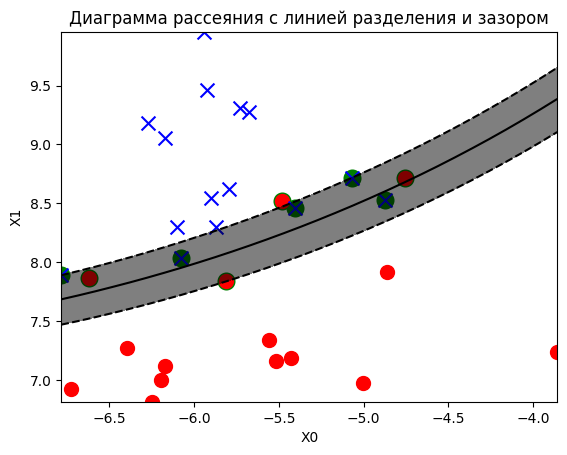

0.8666666666666667
[[12  3]
 [ 1 14]]


In [38]:
from sklearn.datasets import make_blobs


X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)


svm_poly = SVC(kernel='poly', degree=4, C=1000).fit(X, y)
plot_decision_regions(X, y, svm_poly)
y_pred =  svm_poly.predict(X)
print(accuracy_score(y, y_pred))
print(confusion_matrix(y, y_pred))

При увеличении С модель старается более точно описать текущие данные, но при этом теряет обобщенность, то есть на новых данных она будет вести себя хуже

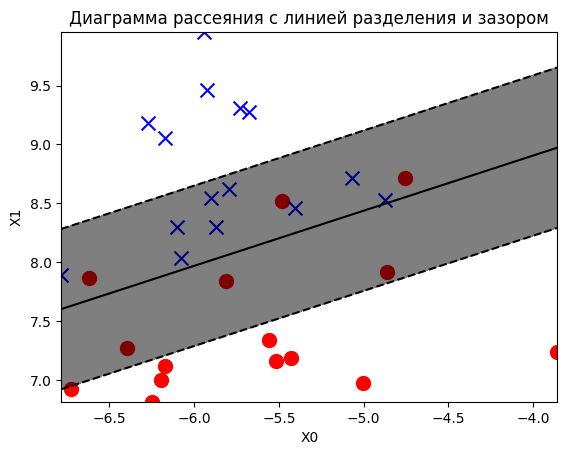

In [39]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


model_linearSVC = make_pipeline(StandardScaler(), LinearSVC(C=1))
model_linearSVC.fit(X, y)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)
Z = model_linearSVC.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

plt.title("Диаграмма рассеяния c линией разделения и зазором")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

### 6. Сгенерируйте датасет для классификации из 1000 точек и 5 атрибутов. Попробуйте применить метод опорных векторов на нем. Найдите методом подбора наилучшее ядро и значение С.

In [40]:
from sklearn.datasets import make_blobs
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X, y = make_blobs(n_samples=1000, centers=2, n_features=5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_rbf = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1)).fit(X_train, y_train)
svm_poly = make_pipeline(StandardScaler(), SVC(kernel='poly', C=1)).fit(X_train, y_train)
svm_linear = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1)).fit(X_train, y_train)

for model, name in zip([svm_rbf, svm_poly, svm_linear], ["SVM RBF", "SVM Poly", "SVM Linear"]):
    y_pred = model.predict(X_test)
    print(f"{name} - Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(confusion_matrix(y_test, y_pred))



SVM RBF - Accuracy: 1.0000
[[151   0]
 [  0 149]]
SVM Poly - Accuracy: 1.0000
[[151   0]
 [  0 149]]
SVM Linear - Accuracy: 1.0000
[[151   0]
 [  0 149]]


### 7. Попробуйте данную модель с большим количеством точек. На каком количестве обучение начинает занимать существенное время

In [41]:
from sklearn.datasets import make_blobs
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import time

X, y = make_blobs(n_samples=10**6, centers=2, n_features=5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

start = time.time()
svm_rbf = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1)).fit(X_train, y_train)
svm_poly = make_pipeline(StandardScaler(), SVC(kernel='poly', C=1)).fit(X_train, y_train)
svm_linear = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1)).fit(X_train, y_train)
end = time.time()

model_time = end - start

print(f"Время обучения моделей: {model_time:.6f} сек")

for model, name in zip([svm_rbf, svm_poly, svm_linear], ["SVM RBF", "SVM Poly", "SVM Linear"]):
    y_pred = model.predict(X_test)
    print(f"{name} - Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(confusion_matrix(y_test, y_pred))

Время обучения моделей: 2.788021 сек
SVM RBF - Accuracy: 1.0000
[[150333      0]
 [     0 149667]]
SVM Poly - Accuracy: 1.0000
[[150333      0]
 [     0 149667]]
SVM Linear - Accuracy: 1.0000
[[150333      0]
 [     0 149667]]


При количестве точек 10^6 обучение происходит быстро, а при количестве точек 10^7 уже уходит много времени на обучение

### 8. Примените метод опорных векторов для задачи множественной классификации. Самостоятельно сгенерируйте визуализируемый датасет для этой задачи. Поробуйте изобразить границу принятия решений и зазор.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


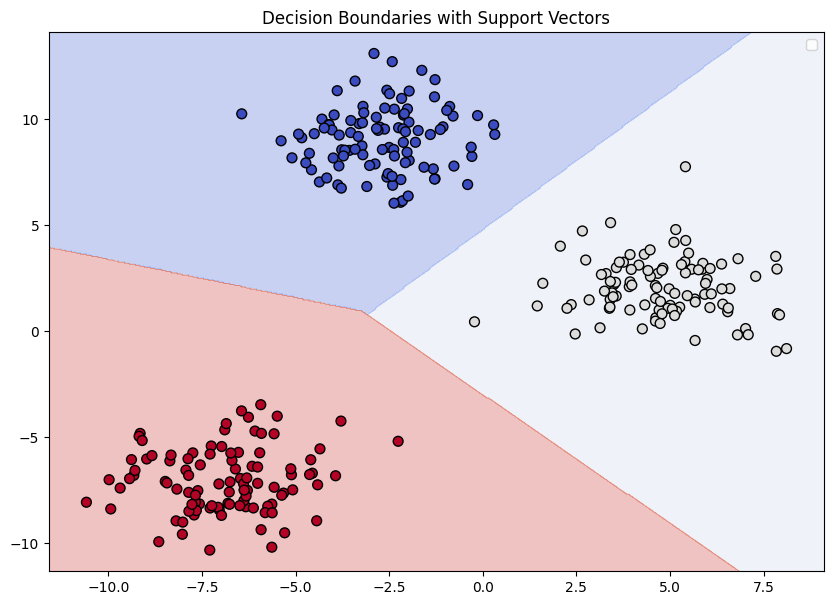

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Генерация данных
X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42, cluster_std=1.5)

# Обучение модели SVM
model = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1))
model.fit(X, y)

# Функция для построения границ решений и зазоров
def plot_multiclass_svc_decision(X, y, model):
    plt.figure(figsize=(10, 7))

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.coolwarm, edgecolors='k')

    plt.title('Decision Boundaries with Support Vectors')
    plt.legend()
    plt.show()

# Визуализация
plot_multiclass_svc_decision(X, y, model)


### 9. Выберите из библиотеки sklearn готовый датасет для классификации и попробуйте смоделировать его при помощи метода опорных векторов.

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1))

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9766081871345029

Confusion Matrix:
 [[ 61   2]
 [  2 106]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



# 10. Повторите такой же анализ для задачи регрессии и соответствующего датасета.

In [6]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

data = load_diabetes()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, epsilon=0.1))

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 2822.700660735967
R² Score: 0.47711379468482795


# Контрольные вопросы

### Чем отличается класс SVC и LinearSVC в библиотеке sklearn при использовании метода опорных векторов без ядра?
`SVC(kernel='linear')` использует классический метод опорных векторов и решает задачу двойственной оптимизации (медленнее на больших данных).
`LinearSVC` решает задачу прямой оптимизации (быстрее на больших данных), основан на линейной модели и подходит для больших выборок.


### Чем отличается метод опорных векторов с разными ядрами? Как выбор функции ядра влияет на форму границы принятия решения?
Ядро задает способ вычисления скалярного произведения в новом признаковом пространстве.
Разные ядра:
  - `linear` — граница решения прямая.
  - `poly` — граница полиномиальная (изгибается в зависимости от степени).
  - `rbf` — радиальная граница (может "обволакивать" сложные структуры).
  - `sigmoid` — граница похожа на нейронную сеть.
Выбор ядра влияет на форму разделяющей поверхности и способность модели справляться со сложными распределениями.


### Как метод опорных векторов работает в задачах множественной классификации?
Применяется стратегия One-vs-Rest (OvR) — обучается отдельный классификатор для каждого класса против всех остальных. Выбирается класс с максимальной уверенной оценкой.


### Как метод опорных векторов может быть использован для решения задачи регрессии?
Используется класс `SVR` (Support Vector Regression).
Модель пытается предсказать значения так, чтобы ошибки укладывались в допущенный зазор (`epsilon`).
Поддерживаются разные ядра для нелинейной регрессии.
